<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/MM_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [82]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [83]:
import warnings

warnings.filterwarnings('ignore')

input

In [84]:
df = pd.read_csv("pp_algo.csv")

exploratory

In [85]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Knowledge        1238 non-null   int64  
 1   Problem Solving  1238 non-null   int64  
 2   Interaction      1238 non-null   int64  
 3   Impact           1052 non-null   float64
 4   Accountability   1238 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 48.5 KB


In [86]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,52,20,27,30.0,0
1,52,20,27,30.0,0
2,52,20,27,30.0,0
3,52,15,27,30.0,0
4,52,15,27,30.0,0


checks

In [87]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,1238.000000,1238.000000,1238.000000,1052.000000,1238.000000
mean,116.162359,43.707593,52.138934,109.249049,24.983037
std,60.711947,25.375788,21.767978,50.871947,19.355472
min,40.000000,15.000000,27.000000,30.000000,0.000000
25%,75.000000,27.000000,36.000000,64.000000,0.000000
50%,94.000000,36.000000,52.000000,90.000000,25.000000
75%,148.000000,65.000000,66.000000,142.000000,40.000000
max,300.000000,150.000000,129.000000,260.000000,75.000000


In [88]:
X=df

Scaling

In [89]:
cols = X.columns

In [90]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [91]:
X = pd.DataFrame(X, columns=[cols])

In [92]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.046154,0.037037,0.0,0.0,0.0
1,0.046154,0.037037,0.0,0.0,0.0
2,0.046154,0.037037,0.0,0.0,0.0
3,0.046154,0.000000,0.0,0.0,0.0
4,0.046154,0.000000,0.0,0.0,0.0


In [93]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.046154,0.037037,0.000000,0.000000,0.000000
1,0.046154,0.037037,0.000000,0.000000,0.000000
2,0.046154,0.037037,0.000000,0.000000,0.000000
3,0.046154,0.000000,0.000000,0.000000,0.000000
4,0.046154,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
1233,0.688462,0.370370,0.215686,0.543478,0.706667
1234,1.000000,1.000000,0.558824,0.921739,0.560000
1235,0.838462,0.370370,0.382353,1.000000,0.800000
1236,1.000000,1.000000,0.558824,0.921739,0.733333


K means

In [94]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [95]:
kmeans.cluster_centers_

array([[0.15545196, 0.09068462, 0.17472107, 0.19031621, 0.17548822],
       [0.51367148, 0.35224001, 0.41855039, 0.54460794, 0.50541485]])

inertia

In [96]:
kmeans.inertia_

146.20351632005512

Elbow

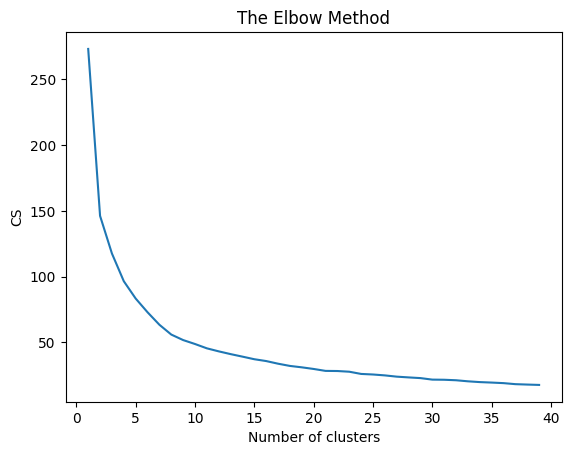

In [97]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

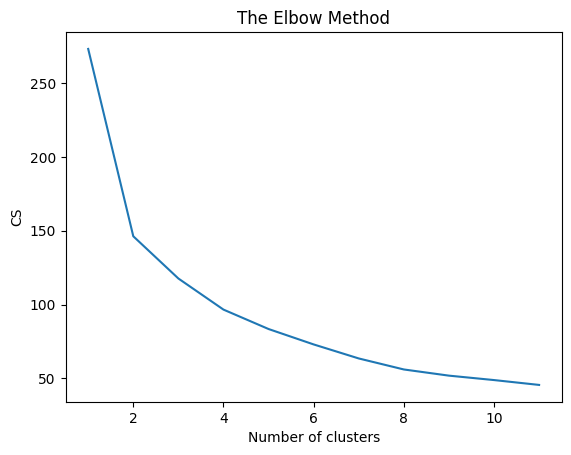

In [107]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [108]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [109]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('pp_algo_l.csv')
print(labels)

[2 2 2 ... 1 1 1]


In [110]:
Z=kmeans.cluster_centers_
Z

array([[ 3.24117492e-01,  2.84373415e-01,  3.97461724e-01,
         4.58308517e-01,  3.96118721e-01],
       [ 7.03811029e-01,  4.16438356e-01,  4.51293760e-01,
         6.15723645e-01,  5.68949772e-01],
       [ 1.48661683e-01,  7.74410774e-02,  1.70231729e-01,
         1.42060788e-01, -8.88178420e-16],
       [ 1.41441441e-01,  7.32065399e-02,  1.18397810e-01,
         2.18429299e-01,  4.29969970e-01]])

In [111]:
import matplotlib

In [112]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 1052 samples in 0.002s...
[t-SNE] Computed neighbors for 1052 samples in 0.162s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1052
[t-SNE] Computed conditional probabilities for sample 1052 / 1052
[t-SNE] Mean sigma: 0.120909
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.579437
[t-SNE] KL divergence after 2200 iterations: 0.234517


In [113]:
np.unique(labels)


array([0, 1, 2, 3], dtype=int32)

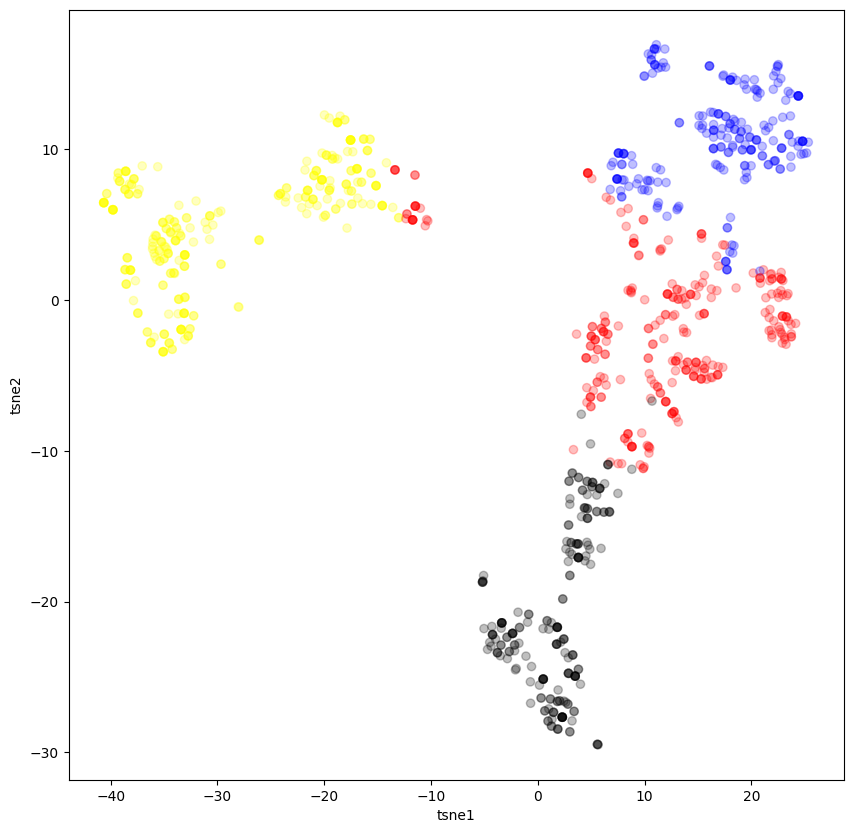

In [114]:
colors = ["red","green","blue","purple","yellow","cyan","black"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [115]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_pp_algo.csv')
Z2

array([[ 1.24270548e+02,  5.33904110e+01,  6.75410959e+01,
         1.35410959e+02,  2.97089041e+01],
       [ 2.22990868e+02,  7.12191781e+01,  7.30319635e+01,
         1.71616438e+02,  4.26712329e+01],
       [ 7.86520376e+01,  2.54545455e+01,  4.43636364e+01,
         6.26739812e+01, -6.66133815e-14],
       [ 7.67747748e+01,  2.48828829e+01,  3.90765766e+01,
         8.02387387e+01,  3.22477477e+01]])